In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

import pandas as pd

# Define the file path
file_path = "/kaggle/input/undergrad/Undergraduate.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)


# Assuming the last column is the target variable
target_column = df.columns[-1]

# Remove leading and trailing spaces from the target column
df[target_column] = df[target_column].str.strip()

# Separate features (X) and target variable (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Label encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Artificial Neural Network (ANN) Classifier
ann_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
ann_classifier.fit(X_train_scaled, y_train)
ann_predictions = ann_classifier.predict(X_test_scaled)

# Machine Learning Classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

for name, classifier in classifiers.items():
    classifier.fit(X_train_scaled, y_train)
    predictions = classifier.predict(X_test_scaled)
    
    # Evaluate the classifier
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Classification Report:\n{report}\n{'='*40}")




Classifier: Random Forest
Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.74      0.71        39
           1       0.87      0.82      0.85        80

    accuracy                           0.80       119
   macro avg       0.77      0.78      0.78       119
weighted avg       0.80      0.80      0.80       119

Classifier: SVM
Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.72      0.73        39
           1       0.86      0.88      0.87        80

    accuracy                           0.82       119
   macro avg       0.80      0.80      0.80       119
weighted avg       0.82      0.82      0.82       119



In [2]:
# Assuming the last column is the target variable
target_column = df.columns[-1]

# Standardize the target column values
df[target_column] = df[target_column].str.strip()

# Print the distribution of the standardized target column
print(df[target_column].value_counts())


Public University     369
Private University    226
Name: Name of your current institution? , dtype: int64


In [3]:
# Iterate through each column and print the distribution of unique values
for column in df.columns:
    # Handle string columns (remove leading and trailing spaces)
    if df[column].dtype == 'object':
        df[column] = df[column].str.strip()
    
    # Print the distribution of unique values
    print(f"\nColumn: {column}")
    print(df[column].value_counts())



Column: What was your SSC GPA?
5.00    446
4.89     14
4.50     13
4.78     10
4.94      9
4.67      8
4.83      7
4.61      6
4.44      6
4.72      5
4.33      4
4.56      3
4.73      3
4.86      3
4.77      2
4.68      2
4.39      2
4.28      2
4.80      2
4.58      2
4.79      2
4.22      2
3.83      2
3.56      2
3.67      2
4.00      2
4.63      2
3.61      2
4.85      2
4.31      2
4.69      1
3.68      1
2.99      1
4.18      1
3.53      1
4.35      1
4.26      1
3.94      1
4.09      1
4.81      1
3.44      1
4.17      1
4.23      1
3.59      1
4.11      1
4.87      1
3.80      1
4.91      1
4.48      1
4.55      1
3.36      1
4.27      1
4.88      1
3.66      1
4.36      1
4.45      1
Name: What was your SSC GPA?, dtype: int64

Column: What was your HSC GPA?
5.00    424
4.83     21
4.67     12
4.75     12
4.92     11
4.58      9
4.33      8
4.00      8
4.25      8
4.42      7
3.92      6
4.50      6
4.17      4
3.58      4
4.08      2
3.68      2
4.80      2
4.85      2
4.69 

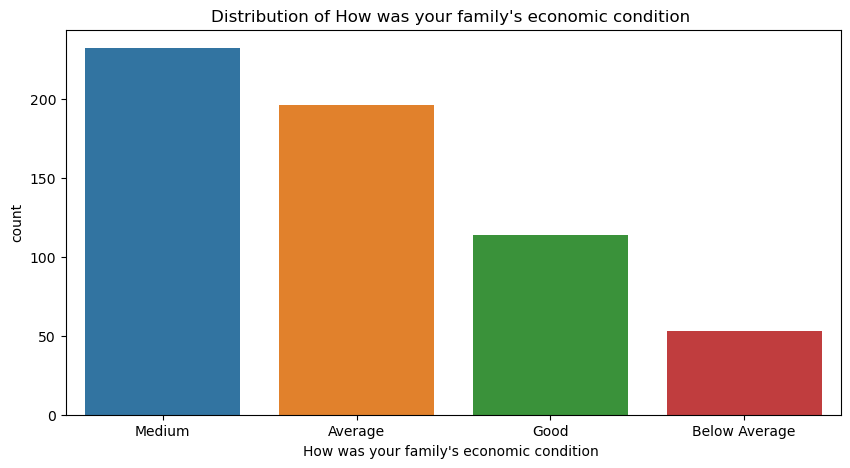

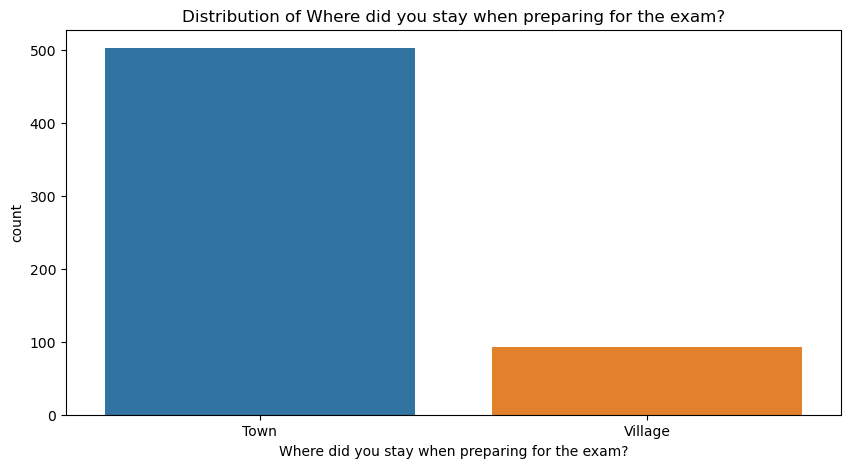

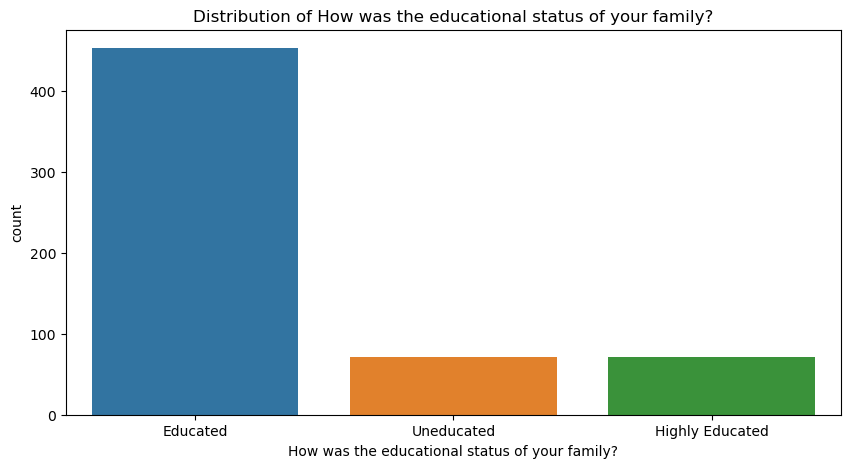

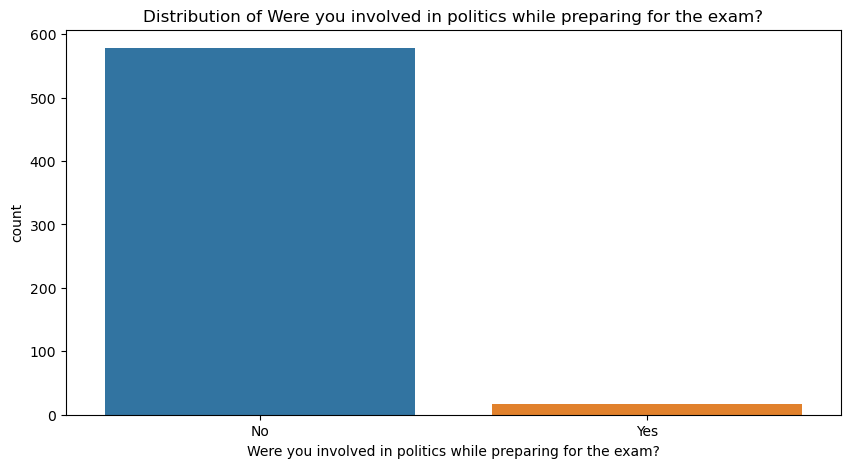

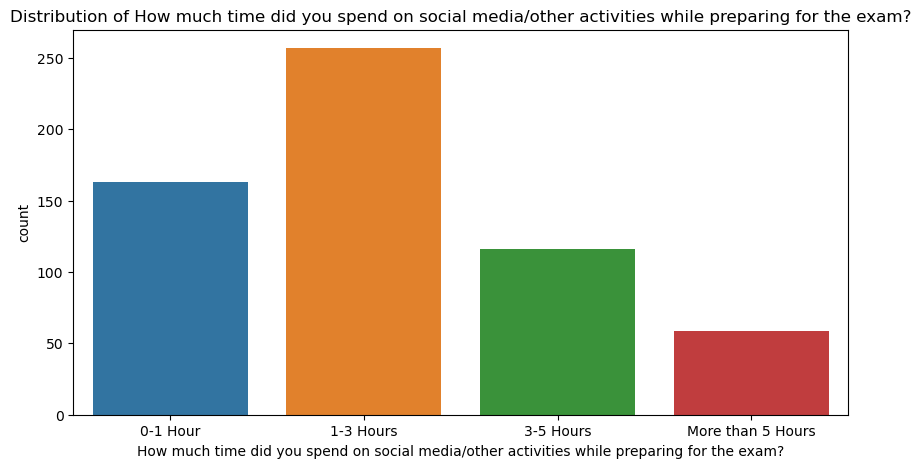

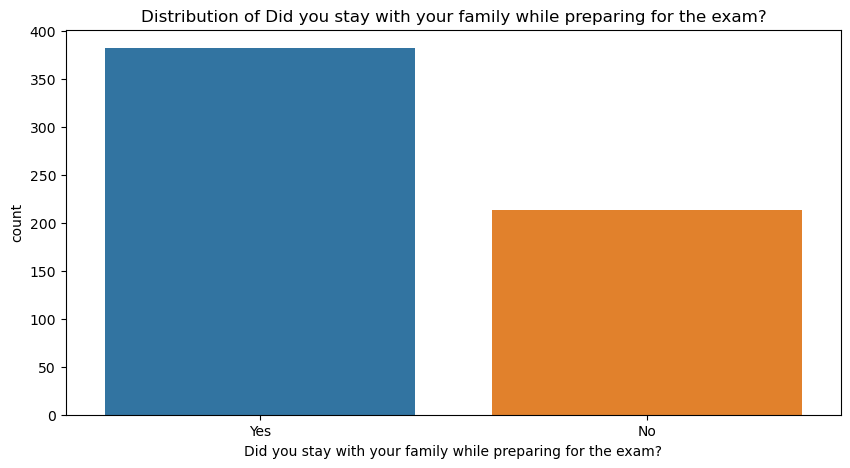

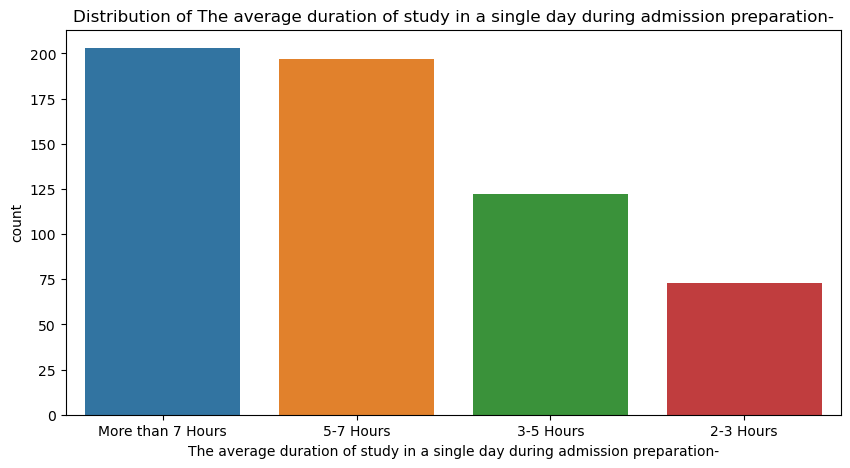

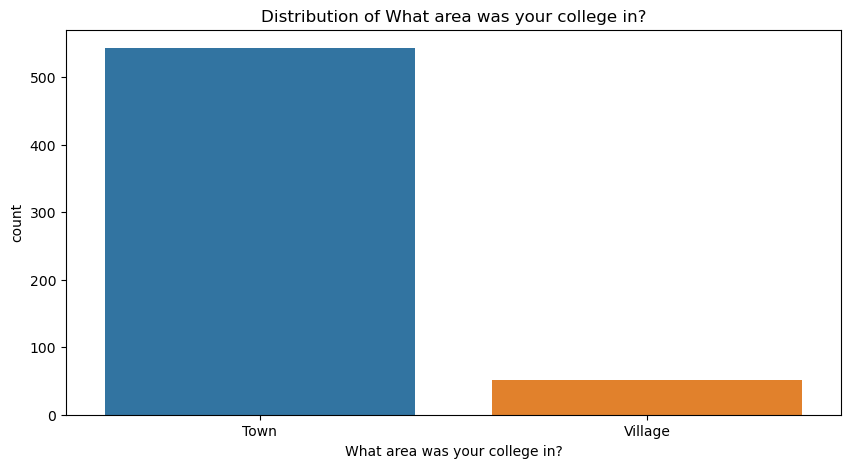

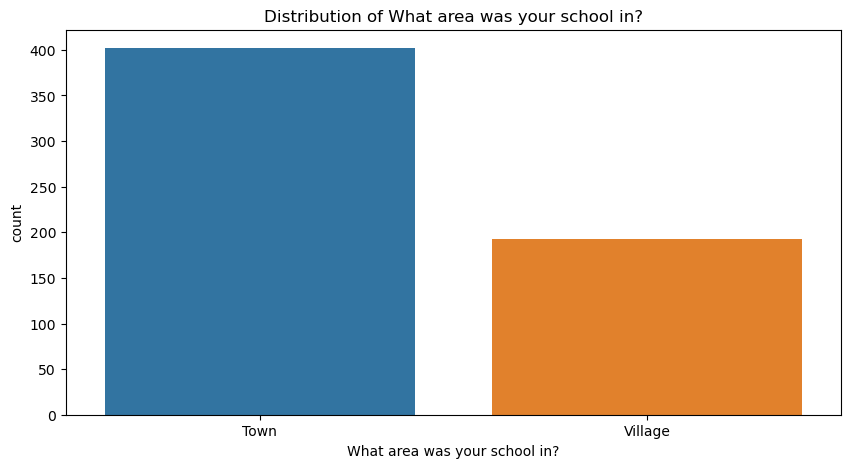

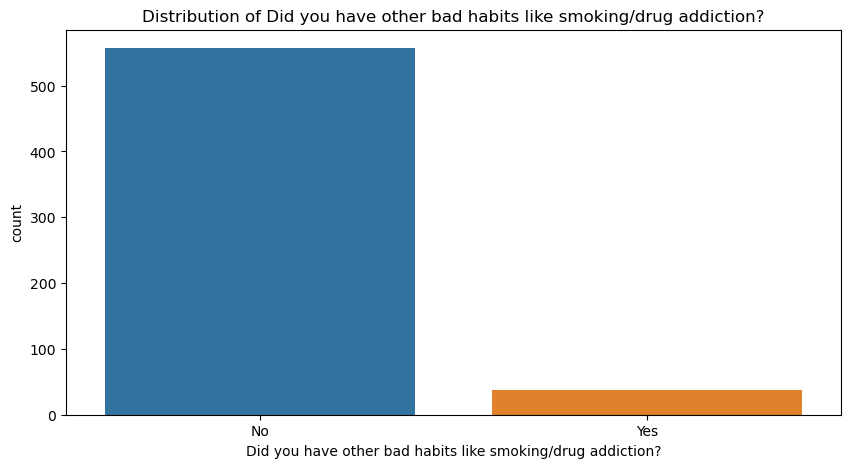

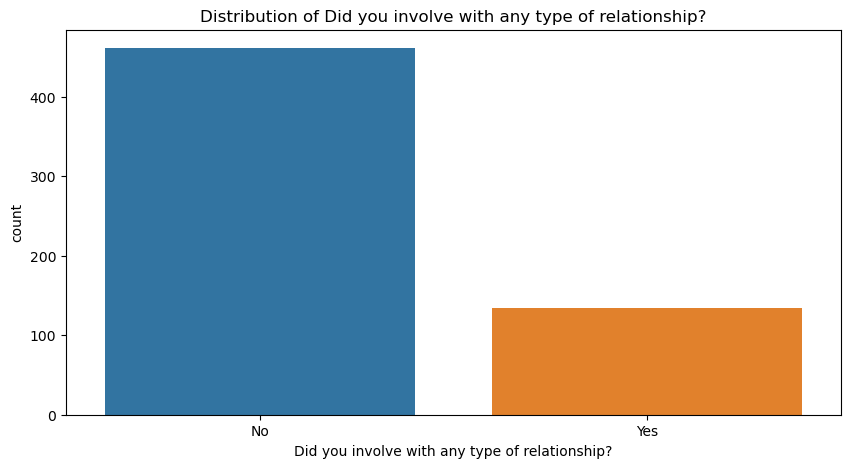

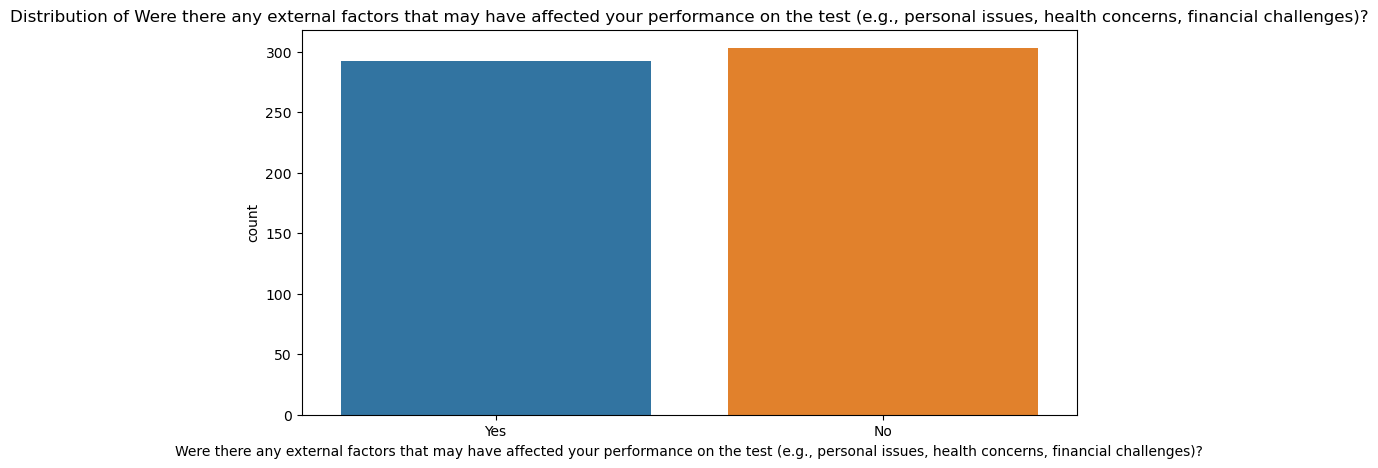

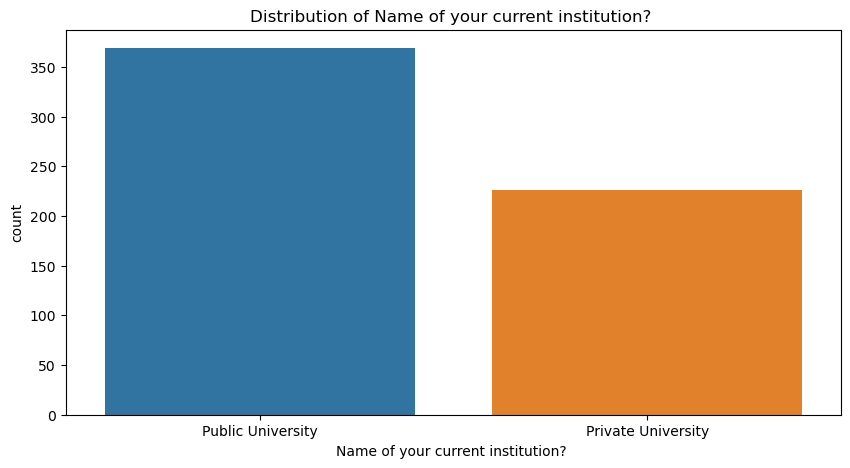

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate through each column (starting from the third column) and create count plots
for column in df.columns[2:]:
    # Handle string columns (remove leading and trailing spaces)
    if df[column].dtype == 'object':
        df[column] = df[column].str.strip()

    # Create a count plot
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.show()


# Binary Classification

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Load the dataset
df = pd.read_csv("/kaggle/input/undergrad/Undergraduate.csv")

# Assuming the last column is the target variable
target_column = df.columns[-1]

# Remove leading and trailing spaces from the target column
df[target_column] = df[target_column].str.strip()

# Separate features (X) and target variable (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Label encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for RandomForestClassifier
param_grid_rf = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [None, 10, 20],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4]
}

# Create a pipeline for preprocessing and RandomForestClassifier
pipeline_rf = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    RandomForestClassifier(random_state=42)
)

grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print(f"Best Parameters for RandomForestClassifier: {best_params_rf}")

# Evaluate the RandomForestClassifier with the best parameters
best_rf_classifier = grid_search_rf.best_estimator_
best_rf_predictions = best_rf_classifier.predict(X_test)
best_rf_accuracy = accuracy_score(y_test, best_rf_predictions)
best_rf_report = classification_report(y_test, best_rf_predictions)

print("Random Forest Classifier:")
print(f"Accuracy: {best_rf_accuracy:.2f}")
print(f"Classification Report:\n{best_rf_report}\n{'='*40}")


Best Parameters for RandomForestClassifier: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 50}
Random Forest Classifier:
Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75        39
           1       0.88      0.86      0.87        80

    accuracy                           0.83       119
   macro avg       0.81      0.82      0.81       119
weighted avg       0.83      0.83      0.83       119



# Without encoding first two columns


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv("/kaggle/input/undergrad/Undergraduate.csv")

# Assuming the last column is the target variable
target_column = df.columns[-1]

# Remove leading and trailing spaces from the target column
df[target_column] = df[target_column].str.strip()

# Separate features (X) and target variable (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Separate the columns to be encoded and the columns to be excluded
columns_to_encode = X.drop(columns=[X.columns[0], X.columns[1]]).columns
columns_to_exclude = [X.columns[0], X.columns[1]]

# One-hot encode columns_to_encode
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), columns_to_encode),
        ('passthrough', 'passthrough', columns_to_exclude)
    ],
    remainder='drop'
)

# Label encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for RandomForestClassifier
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}


# Create a pipeline for preprocessing and RandomForestClassifier
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print(f"Best Parameters for RandomForestClassifier: {best_params_rf}")

# Evaluate the RandomForestClassifier with the best parameters
best_rf_classifier = grid_search_rf.best_estimator_
best_rf_predictions = best_rf_classifier.predict(X_test)
best_rf_accuracy = accuracy_score(y_test, best_rf_predictions)
best_rf_report = classification_report(y_test, best_rf_predictions)

print("Random Forest Classifier:")
print(f"Accuracy: {best_rf_accuracy:.2f}")
print(f"Classification Report:\n{best_rf_report}\n{'='*40}")


Best Parameters for RandomForestClassifier: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}
Random Forest Classifier:
Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        39
           1       0.88      0.88      0.88        80

    accuracy                           0.83       119
   macro avg       0.81      0.81      0.81       119
weighted avg       0.83      0.83      0.83       119



In [7]:
# Get feature importances
feature_importances = best_rf_classifier[-1].feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame(list(zip(X_encoded.columns, feature_importances)), columns=['Feature', 'Importance'])

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top features and their importances
print("Top Feature Importances:")
print(feature_importance_df.head(5))  # You can adjust the number to display more or fewer top features


Top Feature Importances:
                                              Feature  Importance
32  Were there any external factors that may have ...    0.307809
31  Were there any external factors that may have ...    0.251323
11  Were you involved in politics while preparing ...    0.040955
17  Did you stay with your family while preparing ...    0.035342
20  The average duration of study in a single day ...    0.031291


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Load the dataset
df = pd.read_csv("/kaggle/input/undergrad/Undergraduate.csv")

# Assuming the last column is the target variable
target_column = df.columns[-1]

# Remove leading and trailing spaces from the target column
df[target_column] = df[target_column].str.strip()

# Separate features (X) and target variable (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Label encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


# Hyperparameter tuning for SVM
param_grid_svm = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__gamma': ['scale', 'auto']
}

# Hyperparameter tuning for MLPClassifier
param_grid_mlp = {
    'mlpclassifier__hidden_layer_sizes': [(50,), (100, 50), (100, 50, 20)],
    'mlpclassifier__max_iter': [200, 500, 1000],
    'mlpclassifier__alpha': [0.0001, 0.001, 0.01]
}

# Hyperparameter tuning for DecisionTreeClassifier
param_grid_dt = {
    'decisiontreeclassifier__max_depth': [None, 5, 10, 20],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 4]
}

# Hyperparameter tuning for LogisticRegression
param_grid_lr = {
    'logisticregression__C': [0.1, 1, 10],
    'logisticregression__max_iter': [50, 100, 200]
}

# Hyperparameter tuning for GaussianNB (No hyperparameters to tune)

# Hyperparameter tuning for KNeighborsClassifier
param_grid_knn = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7],
    'kneighborsclassifier__weights': ['uniform', 'distance']
}

# Hyperparameter tuning for AdaBoostClassifier
param_grid_adaboost = {
    'adaboostclassifier__n_estimators': [50, 100, 200],
    'adaboostclassifier__learning_rate': [0.1, 0.5, 1]
}

# Hyperparameter tuning for GradientBoostingClassifier
param_grid_gb = {
    'gradientboostingclassifier__n_estimators': [50, 100, 200],
    'gradientboostingclassifier__learning_rate': [0.01, 0.1, 0.5],
    'gradientboostingclassifier__max_depth': [3, 5, 10]
}

# Create pipelines for each classifier

pipeline_svm = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    SVC(random_state=42)
)

pipeline_mlp = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    MLPClassifier(random_state=42)
)

pipeline_dt = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    DecisionTreeClassifier(random_state=42)
)

pipeline_lr = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    LogisticRegression(random_state=42)
)

pipeline_nb = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    GaussianNB()
)

pipeline_knn = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    KNeighborsClassifier()
)

pipeline_adaboost = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    AdaBoostClassifier(random_state=42)
)

pipeline_gb = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    GradientBoostingClassifier(random_state=42)
)

# Create dictionaries for classifiers and their respective hyperparameter grids
classifiers = {
    'SVM': (pipeline_svm, param_grid_svm),
    'MLPClassifier': (pipeline_mlp, param_grid_mlp),
    'Decision Tree': (pipeline_dt, param_grid_dt),
    'Logistic Regression': (pipeline_lr, param_grid_lr),
    'Naive Bayes': (pipeline_nb, {}),
    'K-Nearest Neighbors': (pipeline_knn, param_grid_knn),
    'AdaBoost': (pipeline_adaboost, param_grid_adaboost),
    'Gradient Boosting': (pipeline_gb, param_grid_gb)
}

# Loop through classifiers
for name, (pipeline, param_grid) in classifiers.items():
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best parameters
    best_params = grid_search.best_params_
    print(f"Best Parameters for {name}: {best_params}")

    # Evaluate the classifier with the best parameters
    best_classifier = grid_search.best_estimator_
    best_predictions = best_classifier.predict(X_test)
    best_accuracy = accuracy_score(y_test, best_predictions)
    # Convert numeric labels back to class names
    class_names = le.classes_
    y_test_names = le.inverse_transform(y_test)
    best_predictions_names = le.inverse_transform(best_predictions)

    best_report = classification_report(y_test_names, best_predictions_names, target_names=class_names)

    print(f"{name} Classifier:")
    print(f"Best Parameters: {best_params}")
    print(f"Accuracy: {best_accuracy:.2f}")
    print(f"Classification Report:\n{best_report}\n{'='*40}")

Best Parameters for SVM: {'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
SVM Classifier:
Best Parameters: {'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Accuracy: 0.84
Classification Report:
                    precision    recall  f1-score   support

Private University       0.78      0.72      0.75        39
 Public University       0.87      0.90      0.88        80

          accuracy                           0.84       119
         macro avg       0.82      0.81      0.82       119
      weighted avg       0.84      0.84      0.84       119



/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

Best Parameters for MLPClassifier: {'mlpclassifier__alpha': 0.0001, 'mlpclassifier__hidden_layer_sizes': (50,), 'mlpclassifier__max_iter': 200}
MLPClassifier Classifier:
Best Parameters: {'mlpclassifier__alpha': 0.0001, 'mlpclassifier__hidden_layer_sizes': (50,), 'mlpclassifier__max_iter': 200}
Accuracy: 0.82
Classification Report:
                    precision    recall  f1-score   support

Private University       0.70      0.77      0.73        39
 Public University       0.88      0.84      0.86        80

          accuracy                           0.82       119
         macro avg       0.79      0.80      0.80       119
      weighted avg       0.82      0.82      0.82       119

Best Parameters for Decision Tree: {'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__min_samples_leaf': 4, 'decisiontreeclassifier__min_samples_split': 10}
Decision Tree Classifier:
Best Parameters: {'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__min_samples_leaf': 4, 

In [9]:

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier

# ... (previous code remains unchanged)

# Hyperparameter tuning for XGBClassifier
param_grid_xgb = {
    'xgbclassifier__n_estimators': [50, 100, 200],
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.5],
    'xgbclassifier__max_depth': [3, 5, 10]
}

# Hyperparameter tuning for LGBMClassifier
param_grid_lgbm = {
    'lgbmclassifier__n_estimators': [50, 100, 200],
    'lgbmclassifier__learning_rate': [0.01, 0.1, 0.5],
    'lgbmclassifier__max_depth': [3, 5, 10]
}

# Hyperparameter tuning for CatBoostClassifier
param_grid_catboost = {
    'catboostclassifier__n_estimators': [50, 100, 200],
    'catboostclassifier__learning_rate': [0.01, 0.1, 0.5],
    'catboostclassifier__max_depth': [3, 5, 10]
}

# Hyperparameter tuning for ExtraTreesClassifier
param_grid_extra_trees = {
    'extratreesclassifier__n_estimators': [50, 100, 200],
    'extratreesclassifier__max_depth': [None, 5, 10, 20],
    'extratreesclassifier__min_samples_split': [2, 5, 10],
    'extratreesclassifier__min_samples_leaf': [1, 2, 4]
}

# Hyperparameter tuning for BaggingClassifier
param_grid_bagging = {
    'baggingclassifier__n_estimators': [50, 100, 200],
    'baggingclassifier__max_samples': [0.5, 0.7, 1.0],
    'baggingclassifier__max_features': [0.5, 0.7, 1.0]
}

# Create pipelines for each classifier

pipeline_xgb = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    XGBClassifier(random_state=42)
)

pipeline_lgbm = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    LGBMClassifier(random_state=42)
)

pipeline_catboost = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    CatBoostClassifier(random_state=42)
)

pipeline_extra_trees = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    ExtraTreesClassifier(random_state=42)
)

pipeline_bagging = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    BaggingClassifier(random_state=42)
)

# Create dictionaries for additional classifiers and their respective hyperparameter grids
additional_classifiers = {
    'XGBClassifier': (pipeline_xgb, param_grid_xgb),
    'LGBMClassifier': (pipeline_lgbm, param_grid_lgbm),
    'CatBoostClassifier': (pipeline_catboost, param_grid_catboost),
    'ExtraTreesClassifier': (pipeline_extra_trees, param_grid_extra_trees),
    'BaggingClassifier': (pipeline_bagging, param_grid_bagging)
}

# Combine the classifiers
all_classifiers = {**classifiers, **additional_classifiers}

# Loop through all classifiers
for name, (pipeline, param_grid) in all_classifiers.items():
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best parameters
    best_params = grid_search.best_params_
    print(f"Best Parameters for {name}: {best_params}")

    # Evaluate the classifier with the best parameters
    best_classifier = grid_search.best_estimator_
    best_predictions = best_classifier.predict(X_test)
    best_accuracy = accuracy_score(y_test, best_predictions)
    # Convert numeric labels back to class names
    class_names = le.classes_
    y_test_names = le.inverse_transform(y_test)
    best_predictions_names = le.inverse_transform(best_predictions)

    best_report = classification_report(y_test_names, best_predictions_names, target_names=class_names)

    print(f"{name} Classifier:")
    print(f"Best Parameters: {best_params}")
    print(f"Accuracy: {best_accuracy:.2f}")
    print(f"Classification Report:\n{best_report}\n{'='*40}")


Best Parameters for SVM: {'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
SVM Classifier:
Best Parameters: {'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Accuracy: 0.84
Classification Report:
                    precision    recall  f1-score   support

Private University       0.78      0.72      0.75        39
 Public University       0.87      0.90      0.88        80

          accuracy                           0.84       119
         macro avg       0.82      0.81      0.82       119
      weighted avg       0.84      0.84      0.84       119



/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

Best Parameters for MLPClassifier: {'mlpclassifier__alpha': 0.0001, 'mlpclassifier__hidden_layer_sizes': (50,), 'mlpclassifier__max_iter': 200}
MLPClassifier Classifier:
Best Parameters: {'mlpclassifier__alpha': 0.0001, 'mlpclassifier__hidden_layer_sizes': (50,), 'mlpclassifier__max_iter': 200}
Accuracy: 0.82
Classification Report:
                    precision    recall  f1-score   support

Private University       0.70      0.77      0.73        39
 Public University       0.88      0.84      0.86        80

          accuracy                           0.82       119
         macro avg       0.79      0.80      0.80       119
      weighted avg       0.82      0.82      0.82       119

Best Parameters for Decision Tree: {'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__min_samples_leaf': 4, 'decisiontreeclassifier__min_samples_split': 10}
Decision Tree Classifier:
Best Parameters: {'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__min_samples_leaf': 4, 

# Without encoding first two columns

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer

# Load the dataset
df = pd.read_csv("/kaggle/input/undergrad/Undergraduate.csv")

# Assuming the last column is the target variable
target_column = df.columns[-1]

# Remove leading and trailing spaces from the target column
df[target_column] = df[target_column].str.strip()

# Separate features (X) and target variable (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# One-hot encode categorical columns excluding the first two columns
X_encoded = pd.get_dummies(X.drop(columns=X.columns[:2]), columns=categorical_columns)

# Concatenate the first two columns without encoding
X_encoded = pd.concat([X.iloc[:, :2], X_encoded], axis=1)

# Label encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for SVM
param_grid_svm = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__gamma': ['scale', 'auto'],
    'svc__coef0': [0.0, 0.1, 0.5],
    'svc__shrinking': [True, False],
    'svc__probability': [True, False]
}

# Hyperparameter tuning for MLPClassifier
param_grid_mlp = {
    'mlpclassifier__hidden_layer_sizes': [(50,), (100, 50), (100, 50, 20)],
    'mlpclassifier__max_iter': [200, 500, 1000],
    'mlpclassifier__alpha': [0.0001, 0.001, 0.01]
}

# Hyperparameter tuning for DecisionTreeClassifier
param_grid_dt = {
    'decisiontreeclassifier__max_depth': [None, 5, 10, 20],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 4],
    'decisiontreeclassifier__criterion': ['gini', 'entropy'],
    'decisiontreeclassifier__splitter': ['best', 'random']
}

# Hyperparameter tuning for LogisticRegression
param_grid_lr = {
    'logisticregression__C': [0.1, 1, 10],
    'logisticregression__max_iter': [50, 100, 200],
    'logisticregression__penalty': ['l1', 'l2', 'elasticnet'],
    'logisticregression__l1_ratio': [0.1, 0.5, 0.9]
}

# Hyperparameter tuning for GaussianNB (No hyperparameters to tune)

# Hyperparameter tuning for KNeighborsClassifier
param_grid_knn = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Hyperparameter tuning for AdaBoostClassifier
param_grid_adaboost = {
    'adaboostclassifier__n_estimators': [50, 100, 200],
    'adaboostclassifier__learning_rate': [0.1, 0.5, 1]
}

# Hyperparameter tuning for GradientBoostingClassifier
param_grid_gb = {
    'gradientboostingclassifier__n_estimators': [50, 100, 200],
    'gradientboostingclassifier__learning_rate': [0.01, 0.1, 0.5],
    'gradientboostingclassifier__max_depth': [3, 5, 10]
}

# Create pipelines for each classifier

pipeline_svm = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    SVC(random_state=42)
)

pipeline_mlp = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    MLPClassifier(random_state=42)
)

pipeline_dt = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    DecisionTreeClassifier(random_state=42)
)

pipeline_lr = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    LogisticRegression(random_state=42)
)

pipeline_nb = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    GaussianNB()
)

pipeline_knn = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    KNeighborsClassifier()
)

pipeline_adaboost = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    AdaBoostClassifier(random_state=42)
)

pipeline_gb = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    GradientBoostingClassifier(random_state=42)
)

# Create dictionaries for classifiers and their respective hyperparameter grids
classifiers = {
    'SVM': (pipeline_svm, param_grid_svm),
    'MLPClassifier': (pipeline_mlp, param_grid_mlp),
    'Decision Tree': (pipeline_dt, param_grid_dt),
    'Logistic Regression': (pipeline_lr, param_grid_lr),
    'Naive Bayes': (pipeline_nb, {}),
    'K-Nearest Neighbors': (pipeline_knn, param_grid_knn),
    'AdaBoost': (pipeline_adaboost, param_grid_adaboost),
    'Gradient Boosting': (pipeline_gb, param_grid_gb)
}

# Loop through classifiers
for name, (pipeline, param_grid) in classifiers.items():
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best parameters
    best_params = grid_search.best_params_
    print(f"Best Parameters for {name}: {best_params}")

    # Evaluate the classifier with the best parameters
    best_classifier = grid_search.best_estimator_
    best_predictions = best_classifier.predict(X_test)
    best_accuracy = accuracy_score(y_test, best_predictions)
    # Convert numeric labels back to class names
    class_names = le.classes_
    y_test_names = le.inverse_transform(y_test)
    best_predictions_names = le.inverse_transform(best_predictions)

    best_report = classification_report(y_test_names, best_predictions_names, target_names=class_names)

    print(f"{name} Classifier:")
    print(f"Best Parameters: {best_params}")
    print(f"Accuracy: {best_accuracy:.2f}")
    print(f"Classification Report:\n{best_report}\n{'='*40}")

Best Parameters for SVM: {'svc__C': 10, 'svc__coef0': 0.0, 'svc__gamma': 'scale', 'svc__kernel': 'linear', 'svc__probability': True, 'svc__shrinking': True}
SVM Classifier:
Best Parameters: {'svc__C': 10, 'svc__coef0': 0.0, 'svc__gamma': 'scale', 'svc__kernel': 'linear', 'svc__probability': True, 'svc__shrinking': True}
Accuracy: 0.84
Classification Report:
                    precision    recall  f1-score   support

Private University       0.78      0.72      0.75        39
 Public University       0.87      0.90      0.88        80

          accuracy                           0.84       119
         macro avg       0.82      0.81      0.82       119
      weighted avg       0.84      0.84      0.84       119



/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

Best Parameters for MLPClassifier: {'mlpclassifier__alpha': 0.0001, 'mlpclassifier__hidden_layer_sizes': (50,), 'mlpclassifier__max_iter': 200}
MLPClassifier Classifier:
Best Parameters: {'mlpclassifier__alpha': 0.0001, 'mlpclassifier__hidden_layer_sizes': (50,), 'mlpclassifier__max_iter': 200}
Accuracy: 0.82
Classification Report:
                    precision    recall  f1-score   support

Private University       0.70      0.77      0.73        39
 Public University       0.88      0.84      0.86        80

          accuracy                           0.82       119
         macro avg       0.79      0.80      0.80       119
      weighted avg       0.82      0.82      0.82       119

Best Parameters for Decision Tree: {'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__min_samples_leaf': 4, 'decisiontreeclassifier__min_samples_split': 2, 'decisiontreeclassifier__splitter': 'random'}
Decision Tree Classifier:
Best Paramet

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_

Best Parameters for Logistic Regression: {'logisticregression__C': 1, 'logisticregression__l1_ratio': 0.1, 'logisticregression__max_iter': 50, 'logisticregression__penalty': 'l2'}
Logistic Regression Classifier:
Best Parameters: {'logisticregression__C': 1, 'logisticregression__l1_ratio': 0.1, 'logisticregression__max_iter': 50, 'logisticregression__penalty': 'l2'}
Accuracy: 0.82
Classification Report:
                    precision    recall  f1-score   support

Private University       0.75      0.69      0.72        39
 Public University       0.86      0.89      0.87        80

          accuracy                           0.82       119
         macro avg       0.80      0.79      0.80       119
      weighted avg       0.82      0.82      0.82       119

Best Parameters for Naive Bayes: {}
Naive Bayes Classifier:
Best Parameters: {}
Accuracy: 0.80
Classification Report:
                    precision    recall  f1-score   support

Private University       0.70      0.67      0.68   

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Load the dataset
df = pd.read_csv("/kaggle/input/undergrad/Undergraduate.csv")

# Assuming the last column is the target variable
target_column = df.columns[-1]

# Remove leading and trailing spaces from the target column
df[target_column] = df[target_column].str.strip()

# Separate features (X) and target variable (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Label encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for MLPClassifier
param_grid_mlp = {
    'mlpclassifier__hidden_layer_sizes': [(128,), (64,), (32,)],
    'mlpclassifier__activation': ['relu'],
    'mlpclassifier__alpha': [0.0001, 0.001, 0.01],
    'mlpclassifier__batch_size': [32, 64],
    'mlpclassifier__max_iter': [500],
    'mlpclassifier__early_stopping': [True],
    'mlpclassifier__n_iter_no_change': [10],
}

# Create a pipeline for preprocessing and MLPClassifier
pipeline_mlp = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    MLPClassifier(random_state=42)
)

grid_search_mlp = GridSearchCV(pipeline_mlp, param_grid_mlp, cv=5, scoring='accuracy')
grid_search_mlp.fit(X_train, y_train)

# Get the best parameters
best_params_mlp = grid_search_mlp.best_params_
print(f"Best Parameters for MLPClassifier: {best_params_mlp}")

# Evaluate the MLPClassifier with the best parameters
best_mlp_classifier = grid_search_mlp.best_estimator_
best_mlp_predictions = best_mlp_classifier.predict(X_test)
best_mlp_accuracy = accuracy_score(y_test, best_mlp_predictions)
best_mlp_report = classification_report(y_test, best_mlp_predictions)

print("MLP Classifier:")
print(f"Accuracy: {best_mlp_accuracy:.2f}")
print(f"Classification Report:\n{best_mlp_report}\n{'='*40}")


Best Parameters for MLPClassifier: {'mlpclassifier__activation': 'relu', 'mlpclassifier__alpha': 0.01, 'mlpclassifier__batch_size': 32, 'mlpclassifier__early_stopping': True, 'mlpclassifier__hidden_layer_sizes': (128,), 'mlpclassifier__max_iter': 500, 'mlpclassifier__n_iter_no_change': 10}
MLP Classifier:
Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.72      0.75        39
           1       0.87      0.90      0.88        80

    accuracy                           0.84       119
   macro avg       0.82      0.81      0.82       119
weighted avg       0.84      0.84      0.84       119



In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

# Define a more complex ANN model with Dropout and BatchNormalization
ann_model = Sequential()
ann_model.add(Dense(units=128, activation='relu', input_dim=X_train_scaled.shape[1]))
ann_model.add(Dropout(0.5))  # Increase dropout rate
ann_model.add(Dense(units=64, activation='relu'))
ann_model.add(BatchNormalization())
ann_model.add(Dense(units=32, activation='relu'))
ann_model.add(Dropout(0.3))  # Add another dropout layer
ann_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with a lower learning rate
ann_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN model and get history
history = ann_model.fit(X_train_scaled, y_train, epochs=70, batch_size=16, validation_data=(X_test_scaled, y_test))

# Predictions using the ANN
y_pred_ann = (ann_model.predict(X_test_scaled) > 0.5).astype("int32").flatten()

# Evaluate the ANN
accuracy = accuracy_score(y_test, y_pred_ann)
print('For ANN, the accuracy is= ', accuracy)


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Epoch 1/70
30/30 [==============================] - 5s 12ms/step - loss: 0.7277 - accuracy: 0.5945 - val_loss: 0.6693 - val_accuracy: 0.6807
Epoch 2/70
30/30 [==============================] - 0s 5ms/step - loss: 0.7657 - accuracy: 0.5840 - val_loss: 0.6646 - val_accuracy: 0.6471
Epoch 3/70
30/30 [==============================] - 0s 5ms/step - loss: 0.7545 - accuracy: 0.5945 - val_loss: 0.6584 - val_accuracy: 0.6555
Epoch 4/70
30/30 [==============================] - 0s 5ms/step - loss: 0.6987 - accuracy: 0.6282 - val_loss: 0.6502 - val_accuracy: 0.6723
Epoch 5/70
30/30 [==============================] - 0s 5ms/step - loss: 0.7088 - accuracy: 0.5903 - val_loss: 0.6417 - val_accuracy: 0.6891
Epoch 6/70
30/30 [==============================] - 0s 5ms/step - loss: 0.6988 - accuracy: 0.5966 - val_loss: 0.6322 - val_accuracy: 0.6975
Epoch 7/70
30/30 [==============================] - 0s 5ms/step - loss: 0.6955 - accuracy: 0.6324 - val_loss: 0.6235 - val_accuracy: 0.7227
Epoch 8/70
30/30 [=

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

 #Define a more complex ANN model with Dropout and BatchNormalization
ann_model = Sequential()
ann_model.add(Dense(units=512, activation='relu', input_dim=X_train_scaled.shape[1]))
ann_model.add(BatchNormalization())
ann_model.add(Dropout(0.5))
ann_model.add(Dense(units=256, activation='relu'))
ann_model.add(BatchNormalization())
ann_model.add(Dropout(0.4))
ann_model.add(Dense(units=128, activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(units=64, activation='relu'))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(units=1, activation='sigmoid'))

# Implement learning rate scheduling
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=1000,
    decay_rate=0.9
)
ann_model.compile(optimizer=Adam(learning_rate=lr_schedule), loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN model and get history
history = ann_model.fit(X_train_scaled, y_train, epochs=70, batch_size=16, validation_data=(X_test_scaled, y_test))

# Predictions using the ANN
y_pred_ann = (ann_model.predict(X_test_scaled) > 0.5).astype("int32").flatten()

# Evaluate the ANN
print('For ANN:')
print('Accuracy:', accuracy_score(y_test, y_pred_ann))
print('Classification Report:')
print(classification_report(y_test, y_pred_ann))


Epoch 1/70
30/30 [==============================] - 4s 12ms/step - loss: 0.8687 - accuracy: 0.5189 - val_loss: 0.6912 - val_accuracy: 0.5042
Epoch 2/70
30/30 [==============================] - 0s 7ms/step - loss: 0.8038 - accuracy: 0.5441 - val_loss: 0.6610 - val_accuracy: 0.7311
Epoch 3/70
30/30 [==============================] - 0s 6ms/step - loss: 0.7447 - accuracy: 0.5987 - val_loss: 0.6328 - val_accuracy: 0.7899
Epoch 4/70
30/30 [==============================] - 0s 6ms/step - loss: 0.6928 - accuracy: 0.5882 - val_loss: 0.6051 - val_accuracy: 0.7563
Epoch 5/70
30/30 [==============================] - 0s 6ms/step - loss: 0.6581 - accuracy: 0.6450 - val_loss: 0.5828 - val_accuracy: 0.7563
Epoch 6/70
30/30 [==============================] - 0s 6ms/step - loss: 0.7158 - accuracy: 0.6387 - val_loss: 0.5653 - val_accuracy: 0.7815
Epoch 7/70
30/30 [==============================] - 0s 6ms/step - loss: 0.6617 - accuracy: 0.6681 - val_loss: 0.5449 - val_accuracy: 0.7899
Epoch 8/70
30/30 [=

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv("/kaggle/input/undergrad/Undergraduate.csv")

# Assuming the last column is the target variable
target_column = df.columns[-1]

# Remove leading and trailing spaces from the target column
df[target_column] = df[target_column].str.strip()

# Separate features (X) and target variable (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Label encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for MLPClassifier
param_grid_mlp = {
    'mlpclassifier__hidden_layer_sizes': [(128,), (64,), (32,)],
    'mlpclassifier__activation': ['relu'],
    'mlpclassifier__alpha': [0.0001, 0.001, 0.01],
    'mlpclassifier__batch_size': [32, 64],
    'mlpclassifier__max_iter': [500],
    'mlpclassifier__early_stopping': [True],
    'mlpclassifier__n_iter_no_change': [10],
}

# Create a pipeline for preprocessing and MLPClassifier
pipeline_mlp = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    MLPClassifier(random_state=42)
)

grid_search_mlp = GridSearchCV(pipeline_mlp, param_grid_mlp, cv=5, scoring='accuracy')
grid_search_mlp.fit(X_train, y_train)

# Get the best parameters
best_params_mlp = grid_search_mlp.best_params_
print(f"Best Parameters for MLPClassifier: {best_params_mlp}")

# Evaluate the MLPClassifier with the best parameters
best_mlp_classifier = grid_search_mlp.best_estimator_
best_mlp_predictions = best_mlp_classifier.predict(X_test)
best_mlp_accuracy = accuracy_score(y_test, best_mlp_predictions)
best_mlp_report = classification_report(y_test, best_mlp_predictions)

print("MLP Classifier:")
print(f"Accuracy: {best_mlp_accuracy:.2f}")
print(f"Classification Report:\n{best_mlp_report}\n{'='*40}")

# Standardize the features for the ANN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a more complex ANN model with Dropout and BatchNormalization
ann_model = Sequential()
ann_model.add(Dense(units=128, activation='relu', input_dim=X_train_scaled.shape[1]))
ann_model.add(Dropout(0.5))  # Increase dropout rate
ann_model.add(Dense(units=64, activation='relu'))
ann_model.add(BatchNormalization())
ann_model.add(Dense(units=32, activation='relu'))
ann_model.add(Dropout(0.3))  # Add another dropout layer
ann_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with a lower learning rate
ann_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN model and get history
history = ann_model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, validation_data=(X_test_scaled, y_test))

# Predictions using the ANN
y_pred_ann = (ann_model.predict(X_test_scaled) > 0.5).astype("int32").flatten()

# Evaluate the ANN
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print('For ANN, the accuracy is=', accuracy_ann)


Best Parameters for MLPClassifier: {'mlpclassifier__activation': 'relu', 'mlpclassifier__alpha': 0.01, 'mlpclassifier__batch_size': 32, 'mlpclassifier__early_stopping': True, 'mlpclassifier__hidden_layer_sizes': (128,), 'mlpclassifier__max_iter': 500, 'mlpclassifier__n_iter_no_change': 10}
MLP Classifier:
Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.72      0.75        39
           1       0.87      0.90      0.88        80

    accuracy                           0.84       119
   macro avg       0.82      0.81      0.82       119
weighted avg       0.84      0.84      0.84       119

Epoch 1/100
30/30 [==============================] - 2s 10ms/step - loss: 0.7878 - accuracy: 0.5378 - val_loss: 0.6882 - val_accuracy: 0.5546
Epoch 2/100
30/30 [==============================] - 0s 5ms/step - loss: 0.7621 - accuracy: 0.5483 - val_loss: 0.6694 - val_accuracy: 0.5966
Epoch 3/100
30/30 [==========================

# perform predictive modeling and regression analysis

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Define the file path
file_path = "/kaggle/input/undergrad/Undergraduate.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Convert the column to strings and remove leading and trailing spaces
df['What was your SSC GPA?'] = df['What was your SSC GPA?'].astype(str).str.strip()

# Separate features (X) and target variable (y)
target_column = 'What was your SSC GPA?'
X = df.drop(columns=[target_column])
y = df[target_column]

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Standardize the features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')




Mean Squared Error: 0.08871219593882207
R-squared: 0.2676926965975801


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# ... (your previous code for loading and preprocessing data)

# Initialize and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Initialize and train the decision tree regressor model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_scaled, y_train)

# Initialize and train the random forest regressor model
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)

# Initialize and train the gradient boosting regressor model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set for each model
linear_pred = linear_model.predict(X_test_scaled)
dt_pred = dt_model.predict(X_test_scaled)
rf_pred = rf_model.predict(X_test_scaled)
gb_pred = gb_model.predict(X_test_scaled)

# Evaluate each model
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)

dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)

# Print the results
print(f'Linear Regression - Mean Squared Error: {linear_mse}, R-squared: {linear_r2}')
print(f'Decision Tree Regressor - Mean Squared Error: {dt_mse}, R-squared: {dt_r2}')
print(f'Random Forest Regressor - Mean Squared Error: {rf_mse}, R-squared: {rf_r2}')
print(f'Gradient Boosting Regressor - Mean Squared Error: {gb_mse}, R-squared: {gb_r2}')


Linear Regression - Mean Squared Error: 0.08871219593882207, R-squared: 0.2676926965975801
Decision Tree Regressor - Mean Squared Error: 0.10916760037348268, R-squared: 0.0988360709326882
Random Forest Regressor - Mean Squared Error: 0.07722488979139094, R-squared: 0.3625188712758012
Gradient Boosting Regressor - Mean Squared Error: 0.08505367174545979, R-squared: 0.2978933241225852


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Define the file path
file_path = "/kaggle/input/undergrad/Undergraduate.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Convert the target column to numeric, handling errors by setting them to NaN
df['What was your SSC GPA?'] = pd.to_numeric(df['What was your SSC GPA?'], errors='coerce')

# Drop rows with NaN values in the target column
df = df.dropna(subset=['What was your SSC GPA?'])

# Separate features (X) and target variable (y)
target_column = 'What was your SSC GPA?'
X = df.drop(columns=[target_column])
y = df[target_column]

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Initialize and train the decision tree regressor model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_scaled, y_train)

# Initialize and train the random forest regressor model
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)

# Initialize and train the gradient boosting regressor model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train_scaled, y_train)

# Initialize and train the support vector regressor model
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)

# Initialize and train the k-nearest neighbors regressor model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train)

# Initialize and train the lasso regression model
lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the test set for each model
linear_pred = linear_model.predict(X_test_scaled)
dt_pred = dt_model.predict(X_test_scaled)
rf_pred = rf_model.predict(X_test_scaled)
gb_pred = gb_model.predict(X_test_scaled)
svr_pred = svr_model.predict(X_test_scaled)
knn_pred = knn_model.predict(X_test_scaled)
lasso_pred = lasso_model.predict(X_test_scaled)

# Evaluate each model
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)

dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)

svr_mse = mean_squared_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)

knn_mse = mean_squared_error(y_test, knn_pred)
knn_r2 = r2_score(y_test, knn_pred)

lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

# Print the results
print(f'Linear Regression - Mean Squared Error: {linear_mse}, R-squared: {linear_r2}')
print(f'Decision Tree Regressor - Mean Squared Error: {dt_mse}, R-squared: {dt_r2}')
print(f'Random Forest Regressor - Mean Squared Error: {rf_mse}, R-squared: {rf_r2}')
print(f'Gradient Boosting Regressor - Mean Squared Error: {gb_mse}, R-squared: {gb_r2}')
print(f'Support Vector Regressor - Mean Squared Error: {svr_mse}, R-squared: {svr_r2}')
print(f'K-Nearest Neighbors Regressor - Mean Squared Error: {knn_mse}, R-squared: {knn_r2}')
print(f'Lasso Regression - Mean Squared Error: {lasso_mse}, R-squared: {lasso_r2}')


Linear Regression - Mean Squared Error: 0.08871219593882207, R-squared: 0.2676926965975801
Decision Tree Regressor - Mean Squared Error: 0.11005835667600374, R-squared: 0.09148299688255701
Random Forest Regressor - Mean Squared Error: 0.07886273963004654, R-squared: 0.34899864008288717
Gradient Boosting Regressor - Mean Squared Error: 0.08502271664600707, R-squared: 0.2981488543252466
Support Vector Regressor - Mean Squared Error: 0.101808289800656, R-squared: 0.15958619467220425
K-Nearest Neighbors Regressor - Mean Squared Error: 0.106608, R-squared: 0.11996522941486099
Lasso Regression - Mean Squared Error: 0.12195100319539583, R-squared: -0.006689208311643879


# Clustering

/tmp/ipykernel_32/3544839653.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_clustering['Economic Condition'] = label_encoder.fit_transform(X_clustering['How was your family\'s economic condition '])
/tmp/ipykernel_32/3544839653.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_clustering['Educational Status'] = label_encoder.fit_transform(X_clustering['How was the educational status of your family?'])
/tmp/ipykernel_32/3544839653.py:31: SettingWithCopyWarning: 
A value is trying to be set on a 

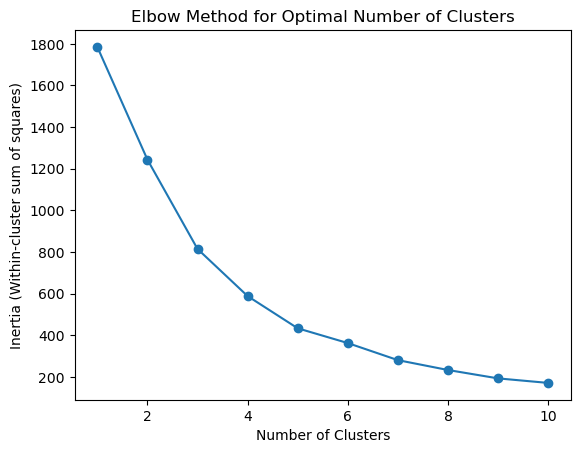

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


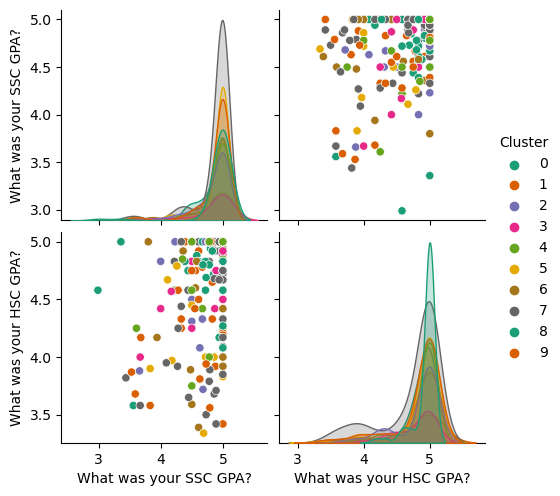

In [18]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Define the file path
file_path = "/kaggle/input/undergrad/Undergraduate.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Extract relevant features for clustering
features_for_clustering = [
    'How was your family\'s economic condition ',
    'How was the educational status of your family?',
    'How much time did you spend on social media/other activities while preparing for the exam?',
    'The average duration of study in a single day during admission preparation-'
]

# Drop rows with missing values in the selected features
df_clustering = df.dropna(subset=features_for_clustering)

# Select the features for clustering
X_clustering = df_clustering[features_for_clustering]

# Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()
X_clustering['Economic Condition'] = label_encoder.fit_transform(X_clustering['How was your family\'s economic condition '])
X_clustering['Educational Status'] = label_encoder.fit_transform(X_clustering['How was the educational status of your family?'])
X_clustering['Social Media Usage'] = label_encoder.fit_transform(X_clustering['How much time did you spend on social media/other activities while preparing for the exam?'])

# Select only numeric columns before applying StandardScaler
numeric_columns = X_clustering.select_dtypes(include=['number']).columns
X_numeric = X_clustering[numeric_columns]

# Standardize the features for better clustering results
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Determine the optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Based on the Elbow method, let's choose the number of clusters (e.g., 3)
num_clusters = 10

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_clustering['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
sns.pairplot(df_clustering, hue='Cluster', palette='Dark2')
plt.show()
